# Libraries

In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import rtree
import matplotlib
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
import folium
from folium.plugins import MarkerCluster
import shapely
from shapely.geometry import Point
import unicodedata
import pysal
from pysal.esda import mapclassify
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import hstack

from sklearn.model_selection import train_test_split

# We'll be using the Tensorflow backend (default).
import tensorflow as tf
from keras import backend as K    #RNN LSTM NOT WORK WITHOUT THIS
from keras.models import model_from_json
import logging
import theano.tensor as T
from keras.models import Model
from keras.layers import Input, Dense

import math
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import LSTM
from keras.layers.recurrent import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Per

# weather data "weather"

In [2]:
weather = pd.read_csv("./weather.csv")
del weather['High Sea Level Press (in)']
del weather['Avg Sea Level Press (in)']
del weather['Low Sea Level Press (in)']
del weather['Avg Temp (F)']
del weather['Avg Dew Point (F)']
del weather['Avg Humidity (%)']
del weather['Avg Visibility (mi)']

weather2018 = weather[weather.Year == 2018]
weather2018 = weather2018[weather2018.Month != 4]
weather2018 = weather2018.reset_index(drop=True)
weather2018.head(weather2018.shape[0])

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 21, "High Temp (F)": 39, "Low Temp (F)": 32, "High Dew Point (F)": 28, "Low Dew Point (F)": 22, "High Humidity (%)": 78, "Low Humidity (%)": 61, "High Visibility (mi)": 10, "Low Visibility (mi)": 10, "High Wind (mph)": 25, "Avg Wind (mph)": 8, "High Wind Gust (mph)": 28, "Snowfall (in)": 0.00, "Precip (in)": 0.00, "Events": None}, index=[78])
df2 = pd.concat([df.ix[:78], line, df.ix[79:]]).reset_index(drop=True)

weather2018 = df2

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 22, "High Temp (F)": 42, "Low Temp (F)": 32, "High Dew Point (F)": 35, "Low Dew Point (F)": 34, "High Humidity (%)": 96, "Low Humidity (%)": 73, "High Visibility (mi)": 10, "Low Visibility (mi)": 1, "High Wind (mph)": 30, "Avg Wind (mph)": 5, "High Wind Gust (mph)": 32, "Snowfall (in)": 0.09, "Precip (in)": 0.09, "Events": 'Both'}, index=[79])
df2 = pd.concat([df.ix[:79], line, df.ix[80:]]).reset_index(drop=True)

weather2018 = df2

weather2017 = weather[weather.Year == 2017]
weather2017 = weather2017.reset_index(drop=True)

weather2016 = weather[weather.Year == 2016]
weather2016 = weather2016.reset_index(drop=True)

weather1617 = weather2016.append(weather2017)
weather1617 = weather1617.reset_index(drop=True)
weather161718 = weather1617.append(weather2018)
weather161718 = weather161718.reset_index(drop=True)


#weather161718.head(weather161718.shape[0])

weather = weather161718

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# bike data "bikes"

# 2016

In [3]:
dataset201601 = pd.read_csv("./2016/201601.csv")
dataset201601 = dataset201601[dataset201601['tripduration'] < 86400]
dataset201601 = dataset201601[['starttime','stoptime']]
dataset201601['starttime'] = dataset201601['starttime'].str[:10]
dataset201601['stoptime'] = dataset201601['stoptime'].str[:10]
dataset201601['freq'] = dataset201601.groupby('starttime')['starttime'].transform('count')
dataset201601 = dataset201601.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201601 = dataset201601.reset_index(drop=True)
del dataset201601['stoptime']
#dataset201601.insert( 0,'index', 1)

dataset201602 = pd.read_csv("./2016/201602.csv")
dataset201602 = dataset201602[dataset201602['tripduration'] < 86400]
dataset201602 = dataset201602[['starttime','stoptime']]
dataset201602['starttime'] = dataset201602['starttime'].str[:10]
dataset201602['stoptime'] = dataset201602['stoptime'].str[:10]
dataset201602['freq'] = dataset201602.groupby('starttime')['starttime'].transform('count')
dataset201602 = dataset201602.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201602 = dataset201602.reset_index(drop=True)
del dataset201602['stoptime']
#dataset201602.insert( 0,'index', 1)

dataset201603 = pd.read_csv("./2016/201603.csv")
dataset201603 = dataset201603[dataset201603['tripduration'] < 86400]
dataset201603 = dataset201603[['starttime','stoptime']]
dataset201603['starttime'] = dataset201603['starttime'].str[:10]
dataset201603['stoptime'] = dataset201603['stoptime'].str[:10]
dataset201603['freq'] = dataset201603.groupby('starttime')['starttime'].transform('count')
dataset201603 = dataset201603.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201603 = dataset201603.reset_index(drop=True)
del dataset201603['stoptime']
#dataset201603.insert( 0,'index', 1)

dataset201604 = pd.read_csv("./2016/201604.csv")
dataset201604 = dataset201604[dataset201604['tripduration'] < 86400]
dataset201604 = dataset201604[['starttime','stoptime']]
dataset201604['starttime'] = dataset201604['starttime'].str[:10]
dataset201604['stoptime'] = dataset201604['stoptime'].str[:10]
dataset201604['freq'] = dataset201604.groupby('starttime')['starttime'].transform('count')
dataset201604 = dataset201604.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201604 = dataset201604.reset_index(drop=True)
del dataset201604['stoptime']
#dataset201604.insert( 0,'index', 1)

dataset201605 = pd.read_csv("./2016/201605.csv")
dataset201605 = dataset201605[dataset201605['tripduration'] < 86400]
dataset201605 = dataset201605[['starttime','stoptime']]
dataset201605['starttime'] = dataset201605['starttime'].str[:10]
dataset201605['stoptime'] = dataset201605['stoptime'].str[:10]
dataset201605['freq'] = dataset201605.groupby('starttime')['starttime'].transform('count')
dataset201605 = dataset201605.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201605 = dataset201605.reset_index(drop=True)
del dataset201605['stoptime']
#dataset201605.insert( 0,'index', 1)

dataset201606 = pd.read_csv("./2016/201606.csv")
dataset201606 = dataset201606[dataset201606['tripduration'] < 86400]
dataset201606 = dataset201606[['starttime','stoptime']]
dataset201606['starttime'] = dataset201606['starttime'].str[:10]
dataset201606['stoptime'] = dataset201606['stoptime'].str[:10]
dataset201606['freq'] = dataset201606.groupby('starttime')['starttime'].transform('count')
dataset201606 = dataset201606.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201606 = dataset201606.reset_index(drop=True)
del dataset201606['stoptime']
#dataset201606.insert( 0,'index', 1)

dataset201607 = pd.read_csv("./2016/201607.csv")
dataset201607 = dataset201607[dataset201607['tripduration'] < 86400]
dataset201607 = dataset201607[['starttime','stoptime']]
dataset201607['starttime'] = dataset201607['starttime'].str[:10]
dataset201607['stoptime'] = dataset201607['stoptime'].str[:10]
dataset201607['freq'] = dataset201607.groupby('starttime')['starttime'].transform('count')
dataset201607 = dataset201607.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201607 = dataset201607.reset_index(drop=True)
del dataset201607['stoptime']
#dataset201607.insert( 0,'index', 1)

dataset201608 = pd.read_csv("./2016/201608.csv")
dataset201608 = dataset201608[dataset201608['tripduration'] < 86400]
dataset201608 = dataset201608[['starttime','stoptime']]
dataset201608['starttime'] = dataset201608['starttime'].str[:10]
dataset201608['stoptime'] = dataset201608['stoptime'].str[:10]
dataset201608['freq'] = dataset201608.groupby('starttime')['starttime'].transform('count')
dataset201608 = dataset201608.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201608 = dataset201608.reset_index(drop=True)
del dataset201608['stoptime']
#dataset201608.insert( 0,'index', 1)

dataset201609 = pd.read_csv("./2016/201609.csv")
dataset201609 = dataset201609[dataset201609['tripduration'] < 86400]
dataset201609 = dataset201609[['starttime','stoptime']]
dataset201609['starttime'] = dataset201609['starttime'].str[:10]
dataset201609['stoptime'] = dataset201609['stoptime'].str[:10]
dataset201609['freq'] = dataset201609.groupby('starttime')['starttime'].transform('count')
dataset201609 = dataset201609.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201609 = dataset201609.reset_index(drop=True)
del dataset201609['stoptime']
#dataset201609.insert( 0,'index', 1)

dataset201610 = pd.read_csv("./2016/201610.csv")
dataset201610 = dataset201610[dataset201610['tripduration'] < 86400]
dataset201610 = dataset201610[['starttime','stoptime']]
dataset201610['starttime'] = dataset201610['starttime'].str[:10]
dataset201610['stoptime'] = dataset201610['stoptime'].str[:10]
dataset201610['freq'] = dataset201610.groupby('starttime')['starttime'].transform('count')
dataset201610 = dataset201610.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201610 = dataset201610.reset_index(drop=True)
del dataset201610['stoptime']
#dataset201610.insert( 0,'index', 1)

dataset201611 = pd.read_csv("./2016/201611.csv")
dataset201611 = dataset201611[dataset201611['tripduration'] < 86400]
dataset201611 = dataset201611[['starttime','stoptime']]
dataset201611['starttime'] = dataset201611['starttime'].str[:10]
dataset201611['stoptime'] = dataset201611['stoptime'].str[:10]
dataset201611['freq'] = dataset201611.groupby('starttime')['starttime'].transform('count')
dataset201611 = dataset201611.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201611 = dataset201611.reset_index(drop=True)
del dataset201611['stoptime']
#dataset201611.insert( 0,'index', 1)

dataset201612 = pd.read_csv("./2016/201612.csv")
dataset201612 = dataset201612[dataset201612['tripduration'] < 86400]
dataset201612 = dataset201612[['starttime','stoptime']]
dataset201612['starttime'] = dataset201612['starttime'].str[:10]
dataset201612['stoptime'] = dataset201612['stoptime'].str[:10]
dataset201612['freq'] = dataset201612.groupby('starttime')['starttime'].transform('count')
dataset201612 = dataset201612.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201612 = dataset201612.reset_index(drop=True)
del dataset201612['stoptime']
#dataset201612.insert( 0,'index', 1)

# 2017

In [4]:
dataset201701 = pd.read_csv("./2017/201701.csv")
dataset201701 = dataset201701[dataset201701['tripduration'] < 86400]
dataset201701 = dataset201701[['starttime','stoptime']]
dataset201701['starttime'] = dataset201701['starttime'].str[:10]
dataset201701['stoptime'] = dataset201701['stoptime'].str[:10]
dataset201701['freq'] = dataset201701.groupby('starttime')['starttime'].transform('count')
dataset201701 = dataset201701.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201701 = dataset201701.reset_index(drop=True)
del dataset201701['stoptime']
#dataset201701.insert( 0,'index', 1)

dataset201702 = pd.read_csv("./2017/201702.csv")
dataset201702 = dataset201702[dataset201702['tripduration'] < 86400]
dataset201702 = dataset201702[['starttime','stoptime']]
dataset201702['starttime'] = dataset201702['starttime'].str[:10]
dataset201702['stoptime'] = dataset201702['stoptime'].str[:10]
dataset201702['freq'] = dataset201702.groupby('starttime')['starttime'].transform('count')
dataset201702 = dataset201702.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201702 = dataset201702.reset_index(drop=True)
del dataset201702['stoptime']
#dataset201702.insert( 0,'index', 1)

dataset201703 = pd.read_csv("./2017/201703.csv")
dataset201703 = dataset201703[dataset201703['tripduration'] < 86400]
dataset201703 = dataset201703[['starttime','stoptime']]
dataset201703['starttime'] = dataset201703['starttime'].str[:10]
dataset201703['stoptime'] = dataset201703['stoptime'].str[:10]
dataset201703['freq'] = dataset201703.groupby('starttime')['starttime'].transform('count')
dataset201703 = dataset201703.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201703 = dataset201703.reset_index(drop=True)
del dataset201703['stoptime']
#dataset201703.insert( 0,'index', 1)

dataset201704 = pd.read_csv("./2017/201704.csv")
dataset201704 = dataset201704[dataset201704['tripduration'] < 86400]
dataset201704 = dataset201704[['starttime','stoptime']]
dataset201704['starttime'] = dataset201704['starttime'].str[:10]
dataset201704['stoptime'] = dataset201704['stoptime'].str[:10]
dataset201704['freq'] = dataset201704.groupby('starttime')['starttime'].transform('count')
dataset201704 = dataset201704.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201704 = dataset201704.reset_index(drop=True)
del dataset201704['stoptime']
#dataset201704.insert( 0,'index', 1)

dataset201705 = pd.read_csv("./2017/201705.csv")
dataset201705 = dataset201705[dataset201705['tripduration'] < 86400]
dataset201705 = dataset201705[['starttime','stoptime']]
dataset201705['starttime'] = dataset201705['starttime'].str[:10]
dataset201705['stoptime'] = dataset201705['stoptime'].str[:10]
dataset201705['freq'] = dataset201705.groupby('starttime')['starttime'].transform('count')
dataset201705 = dataset201705.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201705 = dataset201705.reset_index(drop=True)
del dataset201705['stoptime']
#dataset201705.insert( 0,'index', 1)

dataset201706 = pd.read_csv("./2017/201706.csv")
dataset201706 = dataset201706[dataset201706['tripduration'] < 86400]
dataset201706 = dataset201706[['starttime','stoptime']]
dataset201706['starttime'] = dataset201706['starttime'].str[:10]
dataset201706['stoptime'] = dataset201706['stoptime'].str[:10]
dataset201706['freq'] = dataset201706.groupby('starttime')['starttime'].transform('count')
dataset201706 = dataset201706.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201706 = dataset201706.reset_index(drop=True)
del dataset201706['stoptime']
#dataset201706.insert( 0,'index', 1)

dataset201707 = pd.read_csv("./2017/201707.csv")
dataset201707 = dataset201707[dataset201707['tripduration'] < 86400]
dataset201707 = dataset201707[['starttime','stoptime']]
dataset201707['starttime'] = dataset201707['starttime'].str[:10]
dataset201707['stoptime'] = dataset201707['stoptime'].str[:10]
dataset201707['freq'] = dataset201707.groupby('starttime')['starttime'].transform('count')
dataset201707 = dataset201707.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201707 = dataset201707.reset_index(drop=True)
del dataset201707['stoptime']
#dataset201707.insert( 0,'index', 1)

dataset201708 = pd.read_csv("./2017/201708.csv")
dataset201708 = dataset201708[dataset201708['tripduration'] < 86400]
dataset201708 = dataset201708[['starttime','stoptime']]
dataset201708['starttime'] = dataset201708['starttime'].str[:10]
dataset201708['stoptime'] = dataset201708['stoptime'].str[:10]
dataset201708['freq'] = dataset201708.groupby('starttime')['starttime'].transform('count')
dataset201708 = dataset201708.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201708 = dataset201708.reset_index(drop=True)
del dataset201708['stoptime']
#dataset201708.insert( 0,'index', 1)

dataset201709 = pd.read_csv("./2017/201709.csv")
dataset201709 = dataset201709[dataset201709['tripduration'] < 86400]
dataset201709 = dataset201709[['starttime','stoptime']]
dataset201709['starttime'] = dataset201709['starttime'].str[:10]
dataset201709['stoptime'] = dataset201709['stoptime'].str[:10]
dataset201709['freq'] = dataset201709.groupby('starttime')['starttime'].transform('count')
dataset201709 = dataset201709.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201709 = dataset201709.reset_index(drop=True)
del dataset201709['stoptime']
#dataset201709.insert( 0,'index', 1)

dataset201710 = pd.read_csv("./2017/201710.csv")
dataset201710 = dataset201710[dataset201710['tripduration'] < 86400]
dataset201710 = dataset201710[['starttime','stoptime']]
dataset201710['starttime'] = dataset201710['starttime'].str[:10]
dataset201710['stoptime'] = dataset201710['stoptime'].str[:10]
dataset201710['freq'] = dataset201710.groupby('starttime')['starttime'].transform('count')
dataset201710 = dataset201710.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201710 = dataset201710.reset_index(drop=True)
del dataset201710['stoptime']
#dataset201710.insert( 0,'index', 1)

dataset201711= pd.read_csv("./2017/201711.csv")
dataset201711 = dataset201711[dataset201711['tripduration'] < 86400]
dataset201711 = dataset201711[['starttime','stoptime']]
dataset201711['starttime'] = dataset201711['starttime'].str[:10]
dataset201711['stoptime'] = dataset201711['stoptime'].str[:10]
dataset201711['freq'] = dataset201711.groupby('starttime')['starttime'].transform('count')
dataset201711 = dataset201711.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201711 = dataset201711.reset_index(drop=True)
del dataset201711['stoptime']
#dataset201711.insert( 0,'index', 1)

dataset201712= pd.read_csv("./2017/201712.csv")
dataset201712 = dataset201712[dataset201712['tripduration'] < 86400]
dataset201712 = dataset201712[['starttime','stoptime']]
dataset201712['starttime'] = dataset201712['starttime'].str[:10]
dataset201712['stoptime'] = dataset201712['stoptime'].str[:10]
dataset201712['freq'] = dataset201712.groupby('starttime')['starttime'].transform('count')
dataset201712 = dataset201712.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201712 = dataset201712.reset_index(drop=True)
del dataset201712['stoptime']
#dataset201712.insert( 0,'index', 1)

# 2018.123

In [5]:
dataset201801 = pd.read_csv("./2018/201801.csv")
dataset201801 = dataset201801[dataset201801['tripduration'] < 86400]
dataset201801 = dataset201801[['starttime','stoptime']]
dataset201801['starttime'] = dataset201801['starttime'].str[:10]
dataset201801['stoptime'] = dataset201801['stoptime'].str[:10]
dataset201801['freq'] = dataset201801.groupby('starttime')['starttime'].transform('count')
dataset201801 = dataset201801.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201801 = dataset201801.reset_index(drop=True)
del dataset201801['stoptime']
#dataset201801.insert( 0,'index', 1)

dataset201802 = pd.read_csv("./2018/201802.csv")
dataset201802 = dataset201802[dataset201802['tripduration'] < 86400]
dataset201802 = dataset201802[['starttime','stoptime']]
dataset201802['starttime'] = dataset201802['starttime'].str[:10]
dataset201802['stoptime'] = dataset201802['stoptime'].str[:10]
dataset201802['freq'] = dataset201802.groupby('starttime')['starttime'].transform('count')
dataset201802 = dataset201802.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201802 = dataset201802.reset_index(drop=True)
del dataset201802['stoptime']
#dataset201802.insert( 0,'index', 1)

dataset201803 = pd.read_csv("./2018/201803.csv")
dataset201803 = dataset201803[dataset201803['tripduration'] < 86400]
dataset201803 = dataset201803[['starttime','stoptime']]
dataset201803['starttime'] = dataset201803['starttime'].str[:10]
dataset201803['stoptime'] = dataset201803['stoptime'].str[:10]
dataset201803['freq'] = dataset201803.groupby('starttime')['starttime'].transform('count')
dataset201803 = dataset201803.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201803 = dataset201803.reset_index(drop=True)
del dataset201803['stoptime']
#dataset201803.insert( 0,'index', 1)

df = pd.DataFrame(dataset201803)

line = pd.DataFrame({ "starttime": '2018-03-13', "freq":0}, index=[11])
df2 = pd.concat([df.ix[:11], line, df.ix[12:]]).reset_index(drop=True)

dataset201803 = df2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# 2016 + 2017 +2018.123

In [6]:
frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


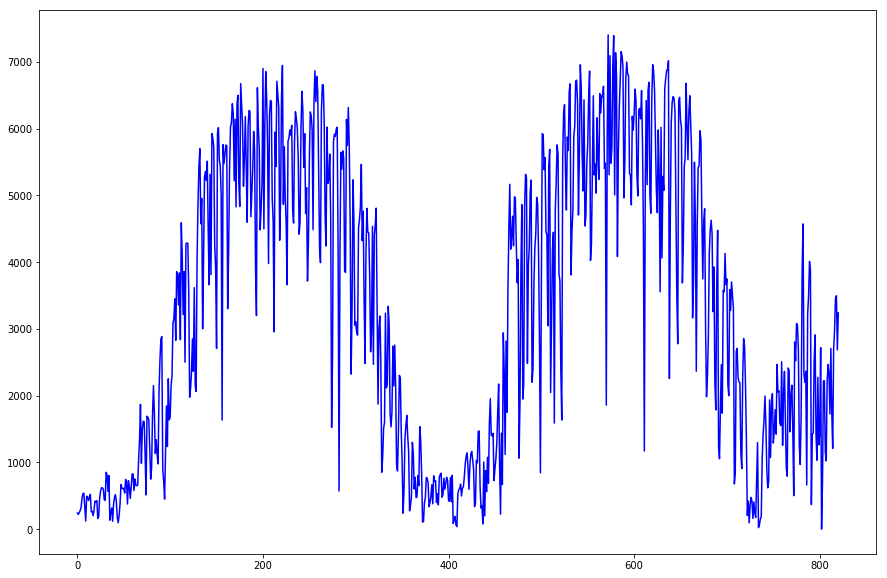

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

# Combined Data "data"

In [8]:
data = pd.concat([bikes, weather], axis=1)


data.to_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

data = pd.read_csv("./data.csv")


# RNN Simple

In [9]:
data = pd.read_csv("./data.csv")

del data['Unnamed: 0']

data

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.032546,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.00,0.00,None
1,2016-01-02,220,0.029710,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.00,0.00,None
2,2016-01-03,245,0.033086,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.00,0.00,None
3,2016-01-04,276,0.037272,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.00,0.00,Snow
4,2016-01-05,325,0.043889,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.00,0.00,None
5,2016-01-06,459,0.061985,2016,1,6,45,21,10,-5,45,12,10,10,15,10,22,0.00,0.00,None
6,2016-01-07,533,0.071978,2016,1,7,43,26,24,6,72,22,10,10,14,6,18,0.00,0.00,None
7,2016-01-08,537,0.072519,2016,1,8,42,30,34,24,85,70,10,10,18,11,23,0.00,0.00,None
8,2016-01-09,327,0.044159,2016,1,9,41,38,38,32,92,76,10,2,16,6,18,0.00,0.01,Rain
9,2016-01-10,121,0.016340,2016,1,10,58,38,57,37,100,83,10,0,30,15,39,0.00,1.38,Rain


In [10]:
number_of_test_data = 350
number_of_holdout_data = 150
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 821 321 350 150


In [11]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [12]:
in_seq1 = array(datatrain['High Temp (F)'])
in_seq2 = array(datatrain['Low Temp (F)'])
in_seq3 = array(datatrain['High Dew Point (F)'])
in_seq4 = array(datatrain['Low Dew Point (F)'])
in_seq5 = array(datatrain['High Humidity (%)'])
in_seq6 = array(datatrain['Low Humidity (%)'])
in_seq7 = array(datatrain['High Visibility (mi)'])
in_seq8 = array(datatrain['Low Visibility (mi)'])
in_seq9 = array(datatrain['High Wind (mph)'])
in_seq10 = array(datatrain['Avg Wind (mph)'])
in_seq11 = array(datatrain['High Wind Gust (mph)'])
in_seq12 = array(datatrain['Snowfall (in)'])
in_seq13 = array(datatrain['Precip (in)'])
out_seq_train = array(datatrain['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [13]:
datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_train))

In [14]:
in_seq1 = array(datatest['High Temp (F)'])
in_seq2 = array(datatest['Low Temp (F)'])
in_seq3 = array(datatest['High Dew Point (F)'])
in_seq4 = array(datatest['Low Dew Point (F)'])
in_seq5 = array(datatest['High Humidity (%)'])
in_seq6 = array(datatest['Low Humidity (%)'])
in_seq7 = array(datatest['High Visibility (mi)'])
in_seq8 = array(datatest['Low Visibility (mi)'])
in_seq9 = array(datatest['High Wind (mph)'])
in_seq10 = array(datatest['Avg Wind (mph)'])
in_seq11 = array(datatest['High Wind Gust (mph)'])
in_seq12 = array(datatest['Snowfall (in)'])
in_seq13 = array(datatest['Precip (in)'])
out_seq_test = array(datatest['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

In [15]:
datatest_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_test))

In [16]:
in_seq1 = array(datahold['High Temp (F)'])
in_seq2 = array(datahold['Low Temp (F)'])
in_seq3 = array(datahold['High Dew Point (F)'])
in_seq4 = array(datahold['Low Dew Point (F)'])
in_seq5 = array(datahold['High Humidity (%)'])
in_seq6 = array(datahold['Low Humidity (%)'])
in_seq7 = array(datahold['High Visibility (mi)'])
in_seq8 = array(datahold['Low Visibility (mi)'])
in_seq9 = array(datahold['High Wind (mph)'])
in_seq10 = array(datahold['Avg Wind (mph)'])
in_seq11 = array(datahold['High Wind Gust (mph)'])
in_seq12 = array(datahold['Snowfall (in)'])
in_seq13 = array(datahold['Precip (in)'])
out_seq_hold = array(datahold['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

In [17]:
datahold_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_hold))

In [18]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

for i in range(len(generator_train)):
	x, y = generator_train[i]
# 	print('%s => %s' % (x, y))

generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

for i in range(len(generator_test)):
	x, y = generator_test[i]
# 	print('%s => %s' % (x, y))

generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

for i in range(len(generator_hold)):
	x, y = generator_hold[i]
# 	print('%s => %s' % (x, y))

In [19]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 10 14


In [20]:
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))
model.add(Dense(1, activation='tanh'))

adam = Adam(lr=0.01)
model.compile(optimizer=adam, loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 76        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [22]:
import time

start = time.time()

score = model.fit_generator(generator_train, epochs=200, verbose=2, validation_data=generator_test)


end = time.time()

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 1s - loss: 1.8236 - val_loss: 1.5491
Epoch 2/200
 - 0s - loss: 1.2349 - val_loss: 0.9195
Epoch 3/200
 - 0s - loss: 0.6857 - val_loss: 0.4805
Epoch 4/200
 - 0s - loss: 0.4409 - val_loss: 0.3934
Epoch 5/200
 - 0s - loss: 0.3347 - val_loss: 0.3785
Epoch 6/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 7/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 8/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 9/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 10/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 11/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 12/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 13/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 14/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 15/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 16/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 17/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 18/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 1

Epoch 150/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 151/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 152/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 153/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 154/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 155/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 156/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 157/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 158/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 159/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 160/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 161/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 162/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 163/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 164/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 165/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 166/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 167/200
 - 0s - loss: 0.3347 - val_loss: 0.3701
Epoch 168/200
 - 0s - loss: 

In [23]:
elapsed = end - start
elapsed

64.81851005554199

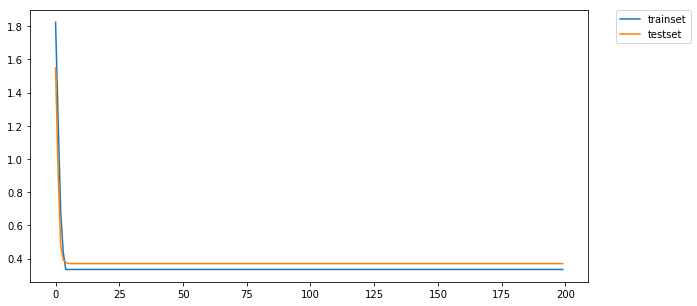

In [24]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [26]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']


In [27]:
pd.options.display.max_rows=1000
df_result

,Actual,Prediction,Diff
0,1599.0,7405.0,3.631019e+02
1,3235.0,7405.0,1.289026e+02
2,2115.0,7405.0,2.501182e+02
3,2178.0,7405.0,2.399908e+02
4,3339.0,7405.0,1.217730e+02
5,3064.0,7405.0,1.416775e+02
6,1733.0,7405.0,3.272937e+02
7,1531.0,7405.0,3.836708e+02
8,1748.0,7405.0,3.236270e+02
9,2742.0,7405.0,1.700584e+02


In [28]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  3565.25
mae: 3839.75
mae/mean ratio:  107.6993198232943 %
correctness:  -7.699319823294303 %


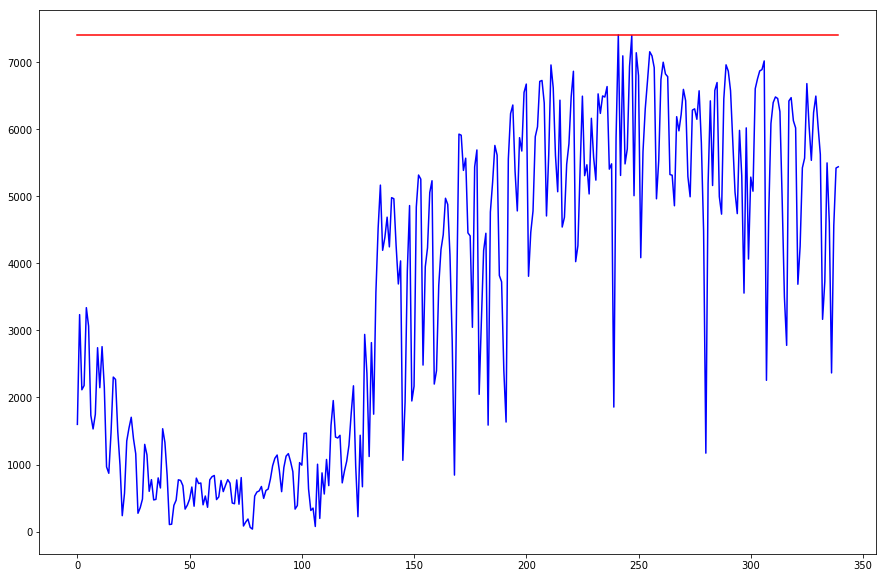

In [29]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [30]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [31]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
df_result

,Actual,Prediction,Diff
0,4138.0,7405.0,7.895118e+01
1,4482.0,7405.0,6.521642e+01
2,4629.0,7405.0,5.996976e+01
3,4432.0,7405.0,6.708032e+01
4,3259.0,7405.0,1.272169e+02
5,3928.0,7405.0,8.851833e+01
6,2199.0,7405.0,2.367440e+02
7,1786.0,7405.0,3.146137e+02
8,3662.0,7405.0,1.022119e+02
9,4477.0,7405.0,6.540094e+01


In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_result)

     Actual  Prediction          Diff
0    4138.0      7405.0  7.895118e+01
1    4482.0      7405.0  6.521642e+01
2    4629.0      7405.0  5.996976e+01
3    4432.0      7405.0  6.708032e+01
4    3259.0      7405.0  1.272169e+02
5    3928.0      7405.0  8.851833e+01
6    2199.0      7405.0  2.367440e+02
7    1786.0      7405.0  3.146137e+02
8    3662.0      7405.0  1.022119e+02
9    4477.0      7405.0  6.540094e+01
10   1231.0      7405.0  5.015435e+02
11   1054.0      7405.0  6.025617e+02
12   1818.0      7405.0  3.073157e+02
13   2463.0      7405.0  2.006496e+02
14   1738.0      7405.0  3.260644e+02
15   3577.0      7405.0  1.070171e+02
16   3553.0      7405.0  1.084154e+02
17   4130.0      7405.0  7.929782e+01
18   3665.0      7405.0  1.020464e+02
19   3748.0      7405.0  9.757204e+01
20   2172.0      7405.0  2.409300e+02
21   1998.0      7405.0  2.706206e+02
22   3589.0      7405.0  1.063249e+02
23   3281.0      7405.0  1.256934e+02
24   3703.0      7405.0  9.997299e+01
25   3506.0 

In [33]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  2013.892857142857
mae: 5391.107142857143
mae/mean ratio:  267.6958272003405 %
correctness:  -167.6958272003405 %


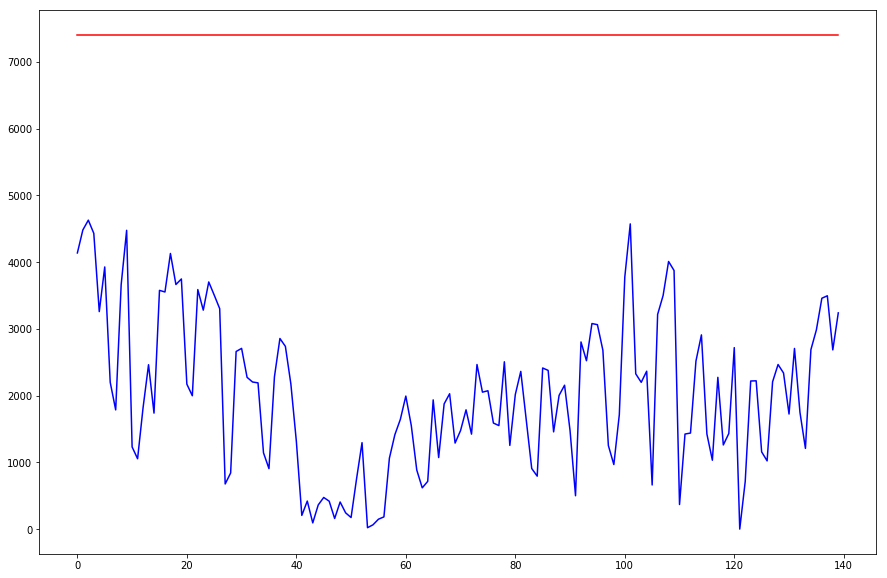

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

# RNN LSTM

In [35]:
data = data['freqscaled']
data

0      0.032546
1      0.029710
2      0.033086
3      0.037272
4      0.043889
5      0.061985
6      0.071978
7      0.072519
8      0.044159
9      0.016340
10     0.066442
11     0.065901
12     0.057529
13     0.063065
14     0.070223
15     0.035111
16     0.036057
17     0.027144
18     0.039433
19     0.056718
20     0.055368
21     0.057394
22     0.021472
23     0.026063
24     0.062525
25     0.076705
26     0.083727
27     0.083322
28     0.080756
29     0.059014
30     0.058204
31     0.114922
32     0.110196
33     0.076300
34     0.108170
35     0.017961
36     0.034841
37     0.042674
38     0.015800
39     0.050371
40     0.063876
41     0.069548
42     0.056178
43     0.023093
44     0.012829
45     0.027144
46     0.051317
47     0.090209
48     0.083322
49     0.081702
50     0.082647
51     0.072924
52     0.100608
53     0.094531
54     0.050777
55     0.097772
56     0.086563
57     0.062120
58     0.084943
59     0.111411
60     0.111816
61     0.078055
62     0

In [36]:
data.values.astype("float32")

array([0.03254558, 0.02970966, 0.03308575, 0.03727211, 0.04388927,
       0.06198515, 0.07197839, 0.07251857, 0.04415935, 0.01634031,
       0.0664416 , 0.06590142, 0.0575287 , 0.0630655 , 0.07022282,
       0.03511141, 0.03605672, 0.02714382, 0.03943282, 0.05671844,
       0.055368  , 0.05739365, 0.02147198, 0.02606347, 0.06252532,
       0.07670493, 0.08372721, 0.08332208, 0.08075625, 0.05901418,
       0.05820392, 0.11492235, 0.11019582, 0.07629979, 0.10817015,
       0.01796084, 0.03484133, 0.04267387, 0.01580014, 0.05037137,
       0.06387576, 0.0695476 , 0.05617826, 0.0230925 , 0.01282917,
       0.02714382, 0.05131668, 0.09020932, 0.08332208, 0.08170155,
       0.08264686, 0.0729237 , 0.1006077 , 0.09453072, 0.0507765 ,
       0.09777178, 0.08656313, 0.06212019, 0.08494261, 0.11141121,
       0.11181634, 0.07805537, 0.10155301, 0.08858879, 0.08764348,
       0.08885888, 0.14071573, 0.18014854, 0.25253206, 0.13328832,
       0.20189062, 0.21836597, 0.21728562, 0.1513842 , 0.06914

In [37]:
data = data.values.reshape(-1,1)     #THIS IS TO BE USED TO GET CORRECT RESHAPE

In [38]:
data[0:5]

array([[0.03254558],
       [0.02970966],
       [0.03308575],
       [0.03727211],
       [0.04388926]])

In [395]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.60

train_size = int(len(data) * TRAIN_SIZE)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (492, 329)


In [396]:
dataset = data

# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [397]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(490, 1)
New training data shape:
(490, 1, 1)


In [398]:
#train_X.shape

In [399]:
#train_Y.shape

In [400]:
#train_X7 = train_X.reshape((-1, 1))
#train_X7.shape

In [401]:
#train_Y2 = train_Y.reshape((-1, 1))
#train_Y2.shape

In [402]:
K.clear_session()  #DOES NOT WORK WITHOUT THIS

def fit_model(train_X, train_Y, window_size = 1):       
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

K.clear_session() # OR THIS

Epoch 1/100
 - 1s - loss: 0.0603
Epoch 2/100
 - 0s - loss: 0.0255
Epoch 3/100
 - 0s - loss: 0.0175
Epoch 4/100
 - 0s - loss: 0.0161
Epoch 5/100
 - 0s - loss: 0.0160
Epoch 6/100
 - 0s - loss: 0.0157
Epoch 7/100
 - 0s - loss: 0.0159
Epoch 8/100
 - 0s - loss: 0.0158
Epoch 9/100
 - 1s - loss: 0.0157
Epoch 10/100
 - 0s - loss: 0.0159
Epoch 11/100
 - 1s - loss: 0.0158
Epoch 12/100
 - 0s - loss: 0.0157
Epoch 13/100
 - 0s - loss: 0.0157
Epoch 14/100
 - 0s - loss: 0.0158
Epoch 15/100
 - 0s - loss: 0.0156
Epoch 16/100
 - 0s - loss: 0.0157
Epoch 17/100
 - 0s - loss: 0.0157
Epoch 18/100
 - 0s - loss: 0.0158
Epoch 19/100
 - 0s - loss: 0.0157
Epoch 20/100
 - 0s - loss: 0.0156
Epoch 21/100
 - 0s - loss: 0.0157
Epoch 22/100
 - 0s - loss: 0.0156
Epoch 23/100
 - 0s - loss: 0.0157
Epoch 24/100
 - 0s - loss: 0.0155
Epoch 25/100
 - 0s - loss: 0.0156
Epoch 26/100
 - 0s - loss: 0.0156
Epoch 27/100
 - 0s - loss: 0.0157
Epoch 28/100
 - 0s - loss: 0.0157
Epoch 29/100
 - 0s - loss: 0.0157
Epoch 30/100
 - 0s - lo

In [403]:
#train_X7.shape

In [404]:
train_X.shape

(490, 1, 1)

In [405]:
train_Y.shape

(490,)

In [406]:
#train_Y2.shape

In [407]:
#train_X7.ndim

In [408]:
train_X.ndim

3

In [409]:
train_Y.ndim

1

In [410]:
#train_Y2.ndim

In [411]:
test_X.shape

(327, 1, 1)

In [412]:
#test_X7 = test_X.reshape((-1, 1))
#test_X7.shape

In [413]:
test_Y.shape

(327,)

In [414]:
#test_Y2 = test_Y.reshape((-1, 1))
#test_Y2.shape

In [415]:
train_X = train_X.reshape((-1, 1))
test_X = test_X.reshape((-1, 1))


# Scoring and correctness - RMSE, mean?

In [416]:

def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(X)
    #pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)


Training data score: 956.52 RMSE
Test data score: 1226.23 RMSE


In [423]:
a = scaler.inverse_transform([train_Y])
b = train_predict
c = a-b
cabs = np.absolute(c)
correct = 100 - cabs/a
correct.mean()

97.2004457167292

In [418]:
#mean2 = a.mean()
#mae2 = np.absolute(c).mean()

#print("mean: ", mean2)
#print("mae:", mae2)
#print("mae/mean ratio: ", 100*mae2/mean2,"%")
#print("correctness: ", 100 - 100*mae2/mean2,"%")

In [419]:
print("Correctness is:")
print(rmse_train / rmse_test)

Correctness is:
0.7800472246750146


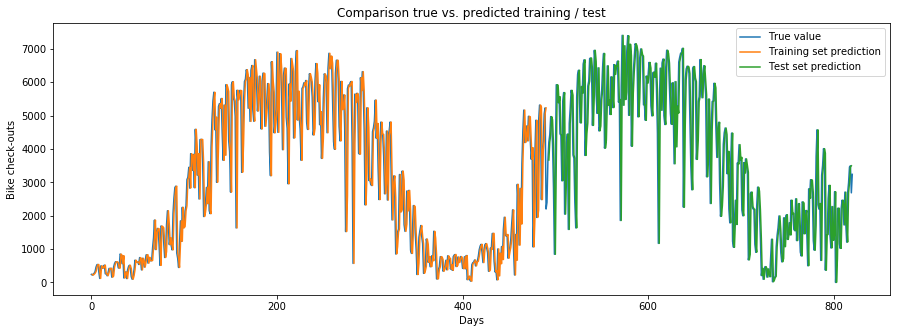

In [420]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")    #or just use "bikes['freq']"
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Days")
plt.ylabel("Bike check-outs")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()